<a href="https://colab.research.google.com/github/Francieli-Cordeiro/Francieli-Cordeiro/blob/main/desafio04DNC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

investimentoPlataformaWeb = pd.read_csv ("/content/MKT.csv", sep = ",")
investimentoPlataformaWeb.head(175)

Análise Descritiva

In [51]:
investimentoPlataformaWeb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


Análise Descritiva

In [52]:
investimentoPlataformaWeb.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


Análise Descritiva

In [53]:
investimentoPlataformaWeb.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


In [ ]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

In [55]:
import seaborn as sns
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

Análise
Exploratória

In [56]:
fig = px.box (investimentoPlataformaWeb, x="sales" )
fig.update_traces(line_color= "blue")

In [57]:
import seaborn as sns

Análise
Exploratória

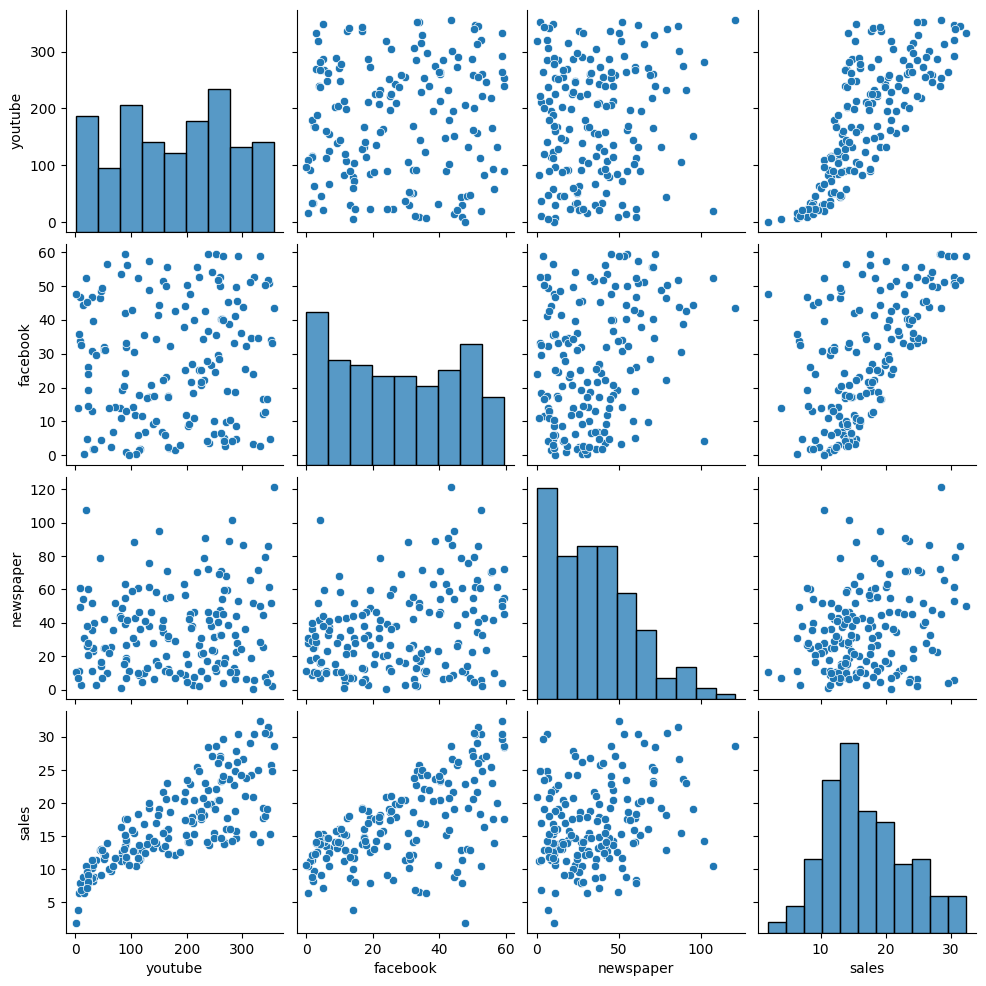

In [58]:
sns.pairplot(investimentoPlataformaWeb)

In [59]:
investimentoPlataformaWeb.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

Análise
Exploratória

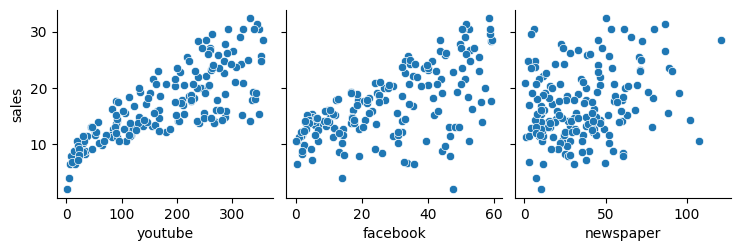

In [60]:
sns.pairplot(investimentoPlataformaWeb, x_vars=['youtube', 'facebook', 'newspaper'], y_vars= 'sales')

Análise
Exploratória

In [61]:
investimentoPlataformaWeb.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


Análise
Exploratória

<Axes: >

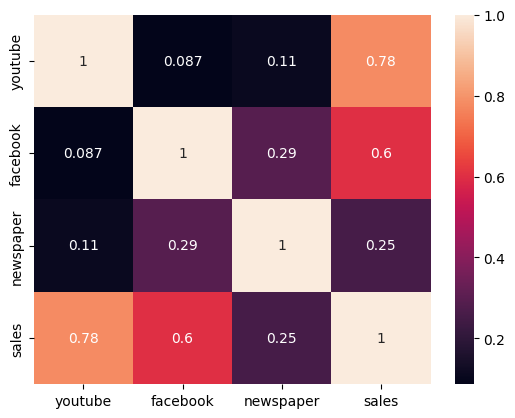

In [62]:
sns.heatmap(investimentoPlataformaWeb.corr(), annot=True)

Análise
Exploratória

<Axes: xlabel='sales', ylabel='Count'>

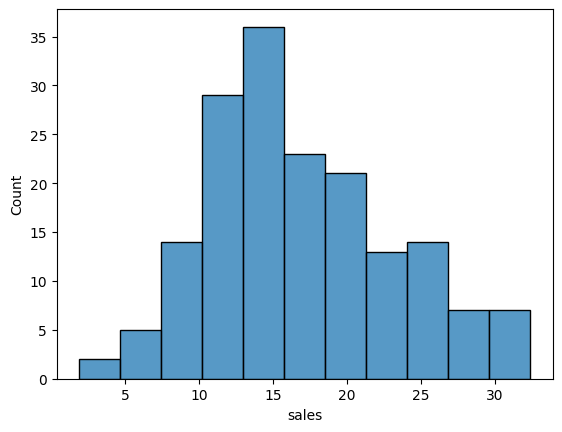

In [63]:
sns.histplot(investimentoPlataformaWeb["sales"])

In [64]:
investimentoPlataformaWeb.columns

Index(['youtube', 'facebook', 'newspaper', 'sales'], dtype='object')

In [65]:
x = investimentoPlataformaWeb[['youtube', 'facebook', 'newspaper']]
y = investimentoPlataformaWeb[['sales']]

Modelagem

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.7, test_size = 0.3, random_state= 42)

In [67]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)




(119, 3)
(52, 3)
(119, 1)
(52, 1)


Modelagem

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train, y_train)

In [33]:
y_pred = lm.predict(x_test)

Calculando
predição


In [35]:
from sklearn.metrics import r2_score
r = r2_score(y_test, y_pred)

In [ ]:
print("r_quadrado:", r)

In [37]:
import matplotlib.pyplot as plt

Coeficiente de Determinação (R^2): 0.882423505618885


Text(0, 0.5, 'Previsão de vendas')

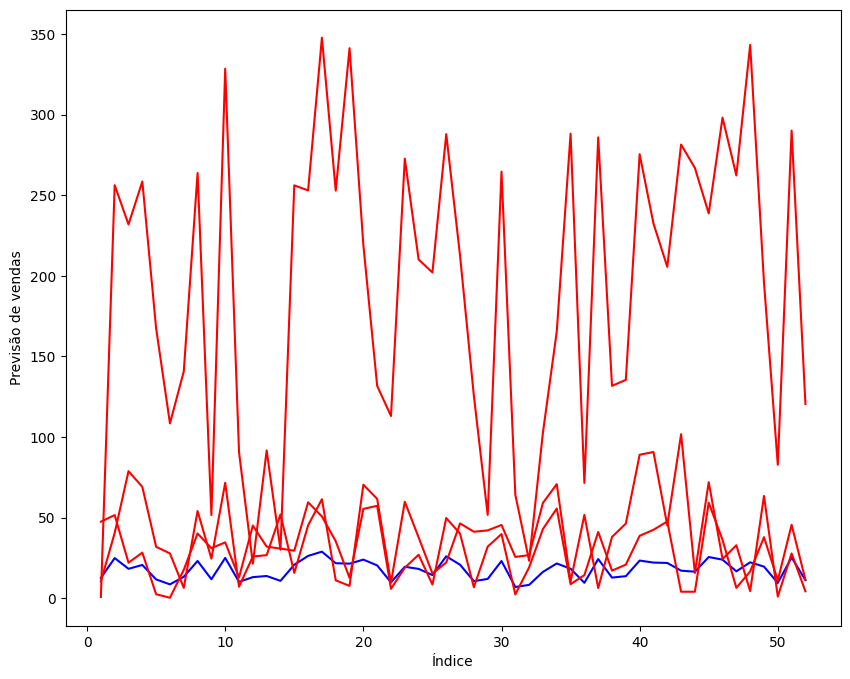

In [50]:
c =[i for i in range(1, x_test.shape[0]+1, 1)]
fig = plt.figure(figsize=(10,8))
plt.plot(c, y_pred ,color="blue")
plt.plot(c, x_test ,color = "red")
plt.xlabel("Índice")
plt.ylabel("Previsão de vendas")
